# CECS 456 Assignment 3

### Name: Justin Chong
### Due: 09/29/2023

In [13]:
import numpy as np
import matplotlib.pyplot as plt


#### 1. Derive g(w) using chain rule:

### part 1-
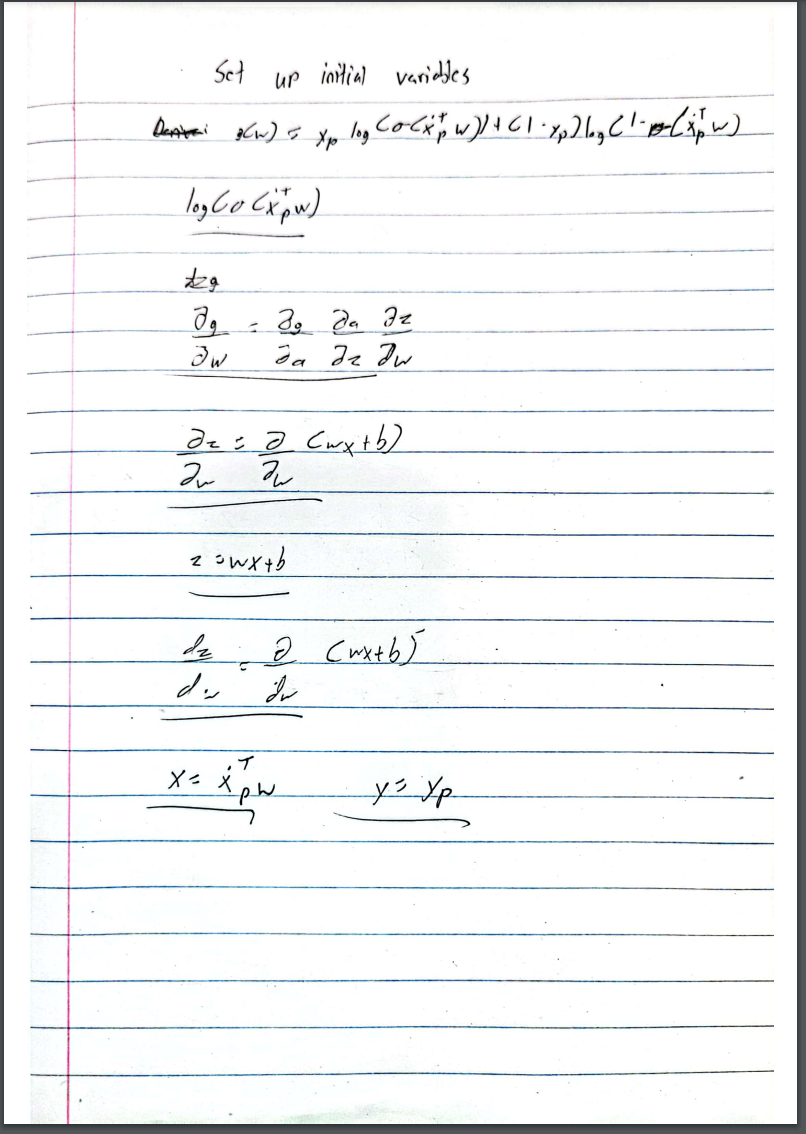


### part 2-
![image-2.png](attachment:image-2.png)

### part 3-
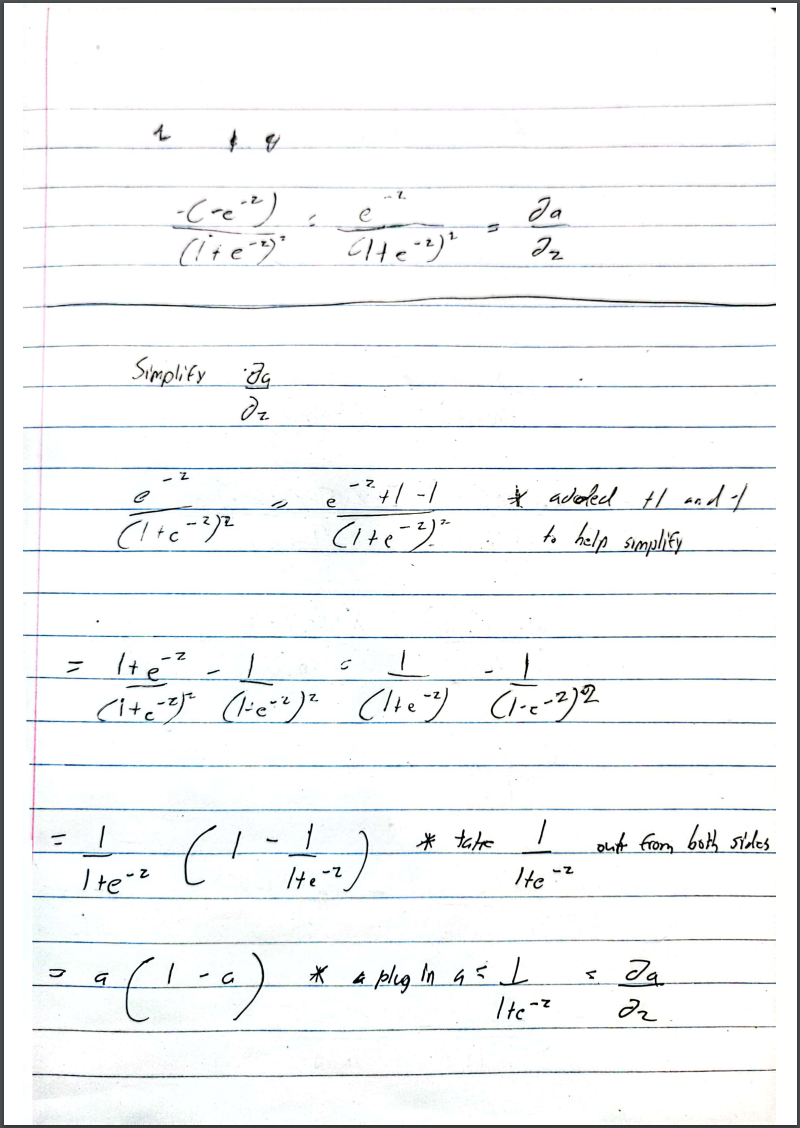

### part 4-
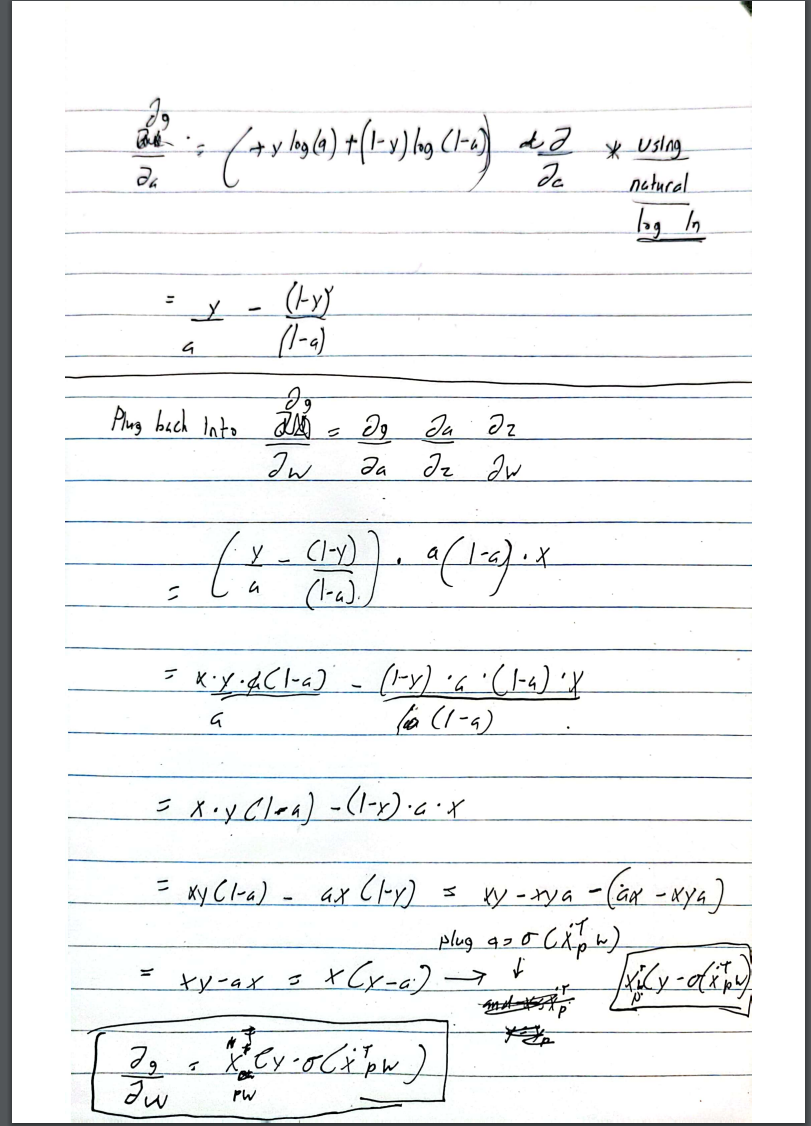

2. Python program that minimizes Cross Entropy linear regression.

In [56]:
def sigmoid(z):
    '''based on cross entropy'''
    return (1/(1+np.exp(-z)))

def x_model(w, x):
    #print(w)
    return w@x.transpose()
    

def g_derive(w, x):
    model = x_model(w, x)
    value = np.dot(x.transpose(),(y_data-sigmoid(model)).transpose())
    #print(y_data-sigmoid(model))
    return -(value/x.size).reshape(1,2)

def g_grad(w, alpha, k, x):
    #x parameter will be based off of what to scale the cross entropy linear regression off of. Technically need y output
    #as well, but in this case the only main important input and output to compare are x_data and y_data given
    #x parameter is prio here over y tho as multiple x datasets are being used (E.G. original x data, data range for line, etc.)
    w_temp = w
    history = []
    for i in range(0,k):
        history.append(g_derive(w_temp, x))
        w_temp -= alpha*g_derive(w_temp, x)
    return (w_temp, history)

    

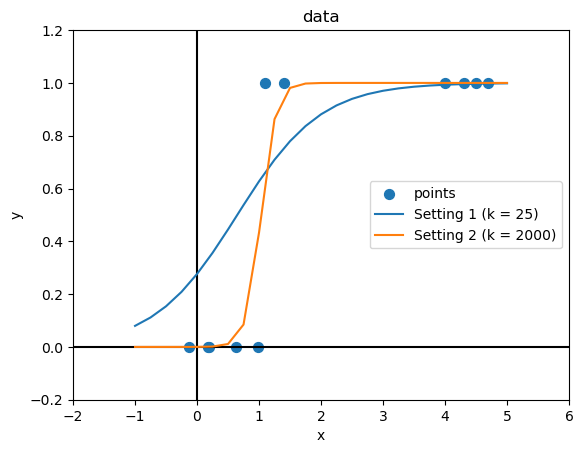

In [65]:
#set up initial
x_data = np.array([[-1.29E-01, 1.71E-01, 1.89E-01, 6.28E-01, 9.87E-01, 1.10E+00, 1.40E+00, 4.00E+00, 4.30E+00, 4.50E+00, 4.70E+00]])
y_data = np.array([[0.00E+00, 0.00E+00, 0.00E+00, 0.00E+00, 0.00E+00, 1.00E+00, 1.00E+00, 1.00E+00, 1.00E+00, 1.00E+00, 1.00E+00]])
x_bias = np.column_stack((np.ones(x_data.transpose().shape),x_data.transpose()))

plt.scatter(x_data, y_data, marker='o', label='points', s=50)
plt.xlabel('x');plt.ylabel('y');plt.title('data');plt.xlim(-2,6);plt.ylim(-0.2,1.2)
plt.axhline(y=0, color='black', linestyle='-');plt.axvline(x=0,color='black',linestyle='-')

data_range = np.linspace(-1,5,k).reshape(1,-1)

# Setting 1
#_b stands for both, _1 stands for setting 1, _2 stands for setting 2
w_b = np.array([[3.0,3.0]])
a_b = 1
k_1 = 25
grad_w_1 = g_grad(w_b, a_b, k_1, x_bias)[0]
data_range = np.linspace(-1,5,k).reshape(1,-1)
y_predict_1 = sigmoid(x_model(grad_w_1,np.column_stack((np.ones(data_range.transpose().shape),data_range.transpose()))))
plt.plot(data_range.transpose(),y_predict_1[...].transpose(), label = "Setting 1 (k = 25)")

#Setting 2
k_2 = 2000
grad_w_2 = g_grad(w_b, a_b, k_2, x_bias)[0]
y_predict_2 = sigmoid(x_model(grad_w_2,np.column_stack((np.ones(data_range.transpose().shape),data_range.transpose()))))
plt.plot(data_range.transpose(),y_predict_2[...].transpose(), label = "Setting 2 (k = 2000)")

plt.legend()

In [62]:
#plt.scatter(25, g_grad(w,1,25)[1], marker='o', label='points', s=50)